In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
# from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
from PIL import Image
from sklearn import preprocessing

C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [17]:
df = pd.read_csv("E_Products.csv")

df["Price"] = pd.to_numeric(df["Price"], errors='coerce')
df["AverageRating"] = pd.to_numeric(df["AverageRating"], errors='coerce')
df["ReviewNumber"] = pd.to_numeric(df["ReviewNumber"], errors='coerce')
df["CreateDate"] = pd.to_datetime(df["CreateDate"])


store_avg_rate = df.groupby("Store").mean()["AverageRating"]
store_products_count = df.groupby("Store").count()["_id"]

pd.DataFrame({'Store':['amazon','dicks','rei'], "avg rating":store_avg_rate, "products number":store_products_count}).reset_index(drop = True)

,Store,avg rating,products number
0,amazon,3.140054,59321
1,dicks,1.834775,7000
2,rei,1.939690,10196


In [18]:
df.describe()

,Price,AverageRating,ReviewNumber
count,75961.000000,73562.000000,75428.000000
mean,48.749922,2.882509,37.850188
std,61.058433,2.270955,111.851199
min,0.000000,0.000000,0.000000
25%,18.160000,0.000000,0.000000
50%,28.210000,4.400000,9.000000
75%,55.000000,4.700000,31.000000
max,949.000000,5.000000,3822.000000


In [15]:
df = df[df["ReviewNumber"] >= 50]

store_avg_rate = df.groupby("Store").mean()["AverageRating"]
store_products_count = df.groupby("Store").count()["_id"]

pd.DataFrame({'Store':['amazon','dicks','rei'], "avg rating":store_avg_rate, "products number":store_products_count}).reset_index(drop = True)

,Store,avg rating,products number
0,amazon,4.474549,12911
1,dicks,4.486759,230
2,rei,4.540249,241


In [20]:
# 匯入 E_Products
Product  = pd.read_csv('E_Products.csv')
Product = Product[Product['ReviewNumber'] >= 50]    # 篩出評論數超過 50 的產品
Product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13382 entries, 2098 to 76515
Data columns (total 23 columns):
_id              13382 non-null object
ImageUrl         13188 non-null object
Bullets          13382 non-null object
FullMaterial     12587 non-null object
CreateDate       13382 non-null object
Color            13382 non-null object
Description      13255 non-null object
Gender           13252 non-null object
ModifiedDate     13382 non-null object
Brand            9787 non-null object
Url              13382 non-null object
Price            13382 non-null object
Name             13381 non-null object
Sport            11354 non-null object
Clothing         13279 non-null object
Material         11619 non-null object
Feature          13382 non-null object
AverageRating    13382 non-null float64
StyleNumber      4298 non-null object
ReviewNumber     13382 non-null float64
Fulltext         13382 non-null object
OurImage         13100 non-null object
Store            13382 non-nul

In [24]:
Product.describe()

,AverageRating,ReviewNumber
count,13382.000000,13382.000000
mean,4.475942,170.120012
std,0.160828,220.267857
min,2.923100,50.000000
25%,4.400000,69.000000
50%,4.500000,103.000000
75%,4.600000,180.000000
max,5.000000,3822.000000


In [162]:
Product.groupby('Store').mean()['AverageRating']

Store
amazon-US    4.474549
dicks        4.486759
rei          4.540249
Name: AverageRating, dtype: float64

In [180]:
pd.DataFrame({'Store':['amazon','dicks','rei'],'Product_Num':Product.groupby('Store').count()['_id']}).reset_index(drop = True)

,Store,Product_Num
0,amazon,12808
1,dicks,230
2,rei,241


In [39]:
# Product = Product.sort_values(by = 'ReviewNumber', ascending = False)
# Product.head(10)

### 價格與平均評價呈弱正相關

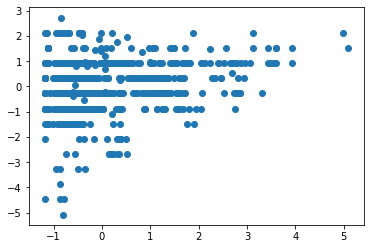

In [23]:
from sklearn import preprocessing

a = Product.sort_values('ReviewNumber',ascending= False).head(1000)

a["Price"] = pd.to_numeric(df["Price"], errors='coerce')
a["AverageRating"] = pd.to_numeric(df["AverageRating"], errors='coerce')
a["ReviewNumber"] = pd.to_numeric(df["ReviewNumber"], errors='coerce')
a["CreateDate"] = pd.to_datetime(df["CreateDate"])

# 將數值標準化
a['Price'] = preprocessing.scale(a['Price'])
a['AverageRating'] = preprocessing.scale(a['AverageRating'])

plt.scatter(a['Price'], a['AverageRating'])

In [167]:
np.corrcoef(a['Price'],a['AverageRating'])

array([[1.        , 0.21292202],
       [0.21292202, 1.        ]])

### Clothing的種類是否影響評分

In [40]:
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

In [173]:
Product_clothing = Product[Product['Clothing'].isnull() == False]
Product_clothing = Product_clothing[Product_clothing['Clothing'] != "[]"]
tmp_dict = {}
Product_clothing = Product_clothing.reset_index(drop = True)


for i in range(Product_clothing.shape[0]):
    tmp = Product_clothing['Clothing'][i].replace("[", "").replace("]", "").split(',')
    
    for j in range(len(tmp)):
        tmp[j] = tmp[j].strip(" ")
        tmp[j] = tmp[j].strip("'")
        if tmp[j] not in tmp_dict:
            tmp_dict[tmp[j]] = 1
        else:
            tmp_dict[tmp[j]] += 1

In [174]:
import operator

sorted_dic = dict(sorted(tmp_dict.items(), key = operator.itemgetter(1), reverse = True))
sorted_dic

{'Pants': 1689,
 'Jackets & Vests': 1610,
 'Other Accessories': 1311,
 'Tops': 1065,
 'Leggings & Tights': 1054,
 'Shorts': 1043,
 'Swimwear': 980,
 'Hoodie & Sweatshirt': 897,
 'Compression wear': 856,
 'Sports Bra': 845,
 'Sock': 761,
 'Long Sleeve': 731,
 'Short Sleeve': 712,
 'Fleece': 590,
 'Bottoms': 461,
 'Vest': 414,
 'Tank': 335,
 'Hats & Scarves': 304,
 'Headband & Sweatband': 170,
 'Softshells': 150,
 'Insulated & Down': 142,
 'Surfing': 140,
 'WetSuit': 131,
 'Skirt & Dresses': 128,
 'Polo': 93,
 'Windwear': 80,
 'Rainwear': 59,
 'Accessories': 24}

In [122]:
# from wordcloud import WordCloud, ImageColorGenerator
# from collections import Counter
# from PIL import Image

# # mask = np.array(Image.open(r"shirt.jpeg"))
# # my_wordcloud = WordCloud(background_color="white",mask = mask , collocations=False, width=2400, height=2400, margin=2)  
# my_wordcloud.generate_from_frequencies(frequencies=Counter(tmp_dict))
 
# #產生圖片
# plt.figure(figsize=(20,10), facecolor='k')
# plt.imshow(my_wordcloud,interpolation='bilinear')
# plt.axis("off")
# plt.tight_layout(pad=0)
# #顯示用
# plt.show()

In [175]:
items = ['Pants', 'Jackets & Vests','Other Accessories', 'Swimwear', 'Hoodie & Sweatshirt']

Producttemp = Product_clothing.sort_values('AverageRating',ascending=False).head(100).reset_index(drop = True)
top_list = []
all_list = []

for item in items:
    counter = 0
    for i in range(Producttemp.shape[0]):
        if item in Producttemp['Clothing'][i]:
            counter +=1
    top_per = counter / 100
    top_list.append(top_per)


for item in items:
    counter = 0
    for i in range(Product_clothing.shape[0]):
        if item in Product_clothing['Clothing'][i]:
            counter += 1
    all_per = counter / Product_clothing.shape[0]
    all_list.append(all_per)

for i in range(len(items)):
    print(items[i], str(round(top_list[i]/all_list[i], 2)))

Pants 0.24
Jackets & Vests 0.0
Other Accessories 2.05
Swimwear 3.06
Hoodie & Sweatshirt 0.35


### Feature 是否影響評分

In [176]:
Product_feature = Product[Product["Feature"] != "[]"].reset_index(drop = True)
feature_dict = {}

for i in range(Product_feature.shape[0]):
    tmp = Product_feature['Feature'][i].replace("[", "").replace("]", "").split(',')
    
    for j in range(len(tmp)):
        tmp[j] = tmp[j].strip(" ")
        tmp[j] = tmp[j].strip("'")
        if tmp[j] not in feature_dict:
            feature_dict[tmp[j]] = 1
        else:
            feature_dict[tmp[j]] += 1

In [177]:
sorted_dic = dict(sorted(feature_dict.items(), key = operator.itemgetter(1), reverse = True))

from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n_items = take(10, sorted_dic.items())
feature_list = []

for i in range(len(n_items)):
    feature_list.append(n_items[i][0])

In [178]:
Producttemp = Product_feature.sort_values('AverageRating',ascending=False).head(100).reset_index(drop = True)
top_list = []
all_list = []

for item in feature_list:
    counter = 0
    for i in range(Producttemp.shape[0]):
        if item in Producttemp['Feature'][i]:
            counter +=1
    top_per = counter / 100
    top_list.append(top_per)


for item in feature_list:
    counter = 0
    for i in range(Product_feature.shape[0]):
        if item in Product_feature['Feature'][i]:
            counter += 1
    all_per = counter / Product_feature.shape[0]
    all_list.append(all_per)

for i in range(len(feature_list)):
    print(feature_list[i], str(round(top_list[i]/all_list[i], 2)))

單向導溼快乾 1.38
涼爽透氣 1.71
蒸發性涼感 1.96
結構性透氣 2.4
保暖禦寒 0.74
刷毛布 0.34
提升運動效能設計 0.73
舒適伸展 1.36
四面彈 0.44
防水 1.65


### 哪種運動服飾評分最佳

,Gender,_id,ImageUrl,Bullets,FullMaterial,CreateDate,Color,Description,ModifiedDate,Brand,...,Sport,Clothing,Material,Feature,AverageRating,StyleNumber,ReviewNumber,Fulltext,OurImage,Store
0,men,5323,5234,5323,4951,5323,5323,5254,5323,3837,...,4535,5323,4463,5323,5323,1678,5323,5323,5175,5323
1,women,4920,4883,4920,4721,4920,4920,4872,4920,3554,...,4446,4920,4398,4920,4920,1546,4920,4920,4868,4920
